## NAIVE BAYES AND TEXT MINING

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

#### 1. Data Exploration and Preprocessing

##### a.  Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [3]:
df = pd.read_csv('blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.shape

(2000, 2)

In [5]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [6]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64

In [7]:
df['text_length'] = df['Data'].apply(lambda x: len(str(x).split()))
df['text_length'].describe()

count     2000.000000
mean       314.166000
std        539.210333
min         31.000000
25%        127.000000
50%        194.000000
75%        319.000000
max      10384.000000
Name: text_length, dtype: float64

In [8]:
df.groupby('Labels').head(2)

,Data,Labels,text_length
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,910
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,163
100,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,121
101,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,136
200,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,comp.os.ms-windows.misc,269
201,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,comp.os.ms-windows.misc,177
300,Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...,comp.sys.ibm.pc.hardware,152
301,Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...,comp.sys.ibm.pc.hardware,109
400,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.sys.mac.hardware,223
401,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...,comp.sys.mac.hardware,154


##### b.  Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords..

In [9]:
import re
import pandas as pd
from nltk.corpus import stopwords

# Make sure stopwords are available
import nltk
nltk.data.path.append("C:\\nltk_data")   # point to your stopwords location

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # lowercase
    text = str(text).lower()
    # remove punctuation & digits
    text = re.sub(r'[^a-z\s]', '', text)
    # split into words (no punkt needed)
    tokens = text.split()
    # remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

# Apply to your column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

# Check result
print(df[['Data', 'cleaned_text']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


##### c.  Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [11]:
# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)   # limit to top 5000 features (optional)

In [12]:
# Fit and transform on cleaned_text
X = tfidf.fit_transform(df['cleaned_text']).toarray()

In [13]:
df.columns

Index(['Data', 'Labels', 'text_length', 'cleaned_text'], dtype='object')

In [14]:
# Assume your target/label column is named 'Labels'
y = df['Labels']

In [16]:
# Split into training and testing set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (1600, 5000)
Shape of testing data: (400, 5000)


 TF-IDF Vectorization → converts your text (cleaned_text) into numeric format.

X → contains the features (numerical vectors of words).

y → is your target label.

train/test split → prepares the data for Naive Bayes (or any ML model).

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Predictions
y_pred = nb.predict(X_test)

In [21]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8425

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.73      0.89      0.80        18
 comp.os.ms-windows.misc       0.91      0.95      0.93        22
comp.sys.ibm.pc.hardware       0.83      0.80      0.82        25
   comp.sys.mac.hardware       0.86      0.90      0.88        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.84      0.89      0.86        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.67      0.75      0.71        16
                 sci.med       0.

#### 2. Naive Bayes Model for Text Classification

##### a.   Split the data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.columns

Index(['Data', 'Labels', 'text_length', 'cleaned_text'], dtype='object')

In [24]:
# Features and Labels
X = df['cleaned_text']
y = df['Labels']

In [25]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1600
Test size: 400


##### b.   Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Create a pipeline with TF-IDF vectorizer + Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [29]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
# Predictions
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.76      0.65      0.70        20
           comp.graphics       0.84      0.80      0.82        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.60      0.75      0.67        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.94      0.80      0.86        20
            misc.forsale       0.86      0.90      0.88        20
               rec.autos       0.95      0.90      0.92        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.94

TfidfVectorizer() converts cleaned text into numerical form.

MultinomialNB() is best suited for text classification.

Pipeline makes sure preprocessing + model training happen together.

We evaluate performance with accuracy score and a classification report (precision, recall, f1-score per class).

##### c.  Train the model on the training set and make predictions on the test set.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# Step 1: Convert text data into numerical vectors
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [34]:
# Step 2: Initialize Naive Bayes classifier
nb_model = MultinomialNB()

In [35]:
# Step 3: Train the model on training data
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [36]:
# Step 4: Make predictions on test data
y_pred = nb_model.predict(X_test_vec)

In [37]:
# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.76      0.65      0.70        20
           comp.graphics       0.84      0.80      0.82        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.60      0.75      0.67        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.94      0.80      0.86        20
            misc.forsale       0.86      0.90      0.88        20
               rec.autos       0.95      0.90      0.92        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.94

#### 3. Sentiment Analysis

##### a.  Choose a suitable library or method for performing sentiment analysis on the blog post texts.

For sentiment analysis of blog post texts, we can use pre-trained libraries that are specifically designed for text sentiment classification. Some popular choices are:

###### 1. TextBlob

Very simple to use.

Provides polarity (negative = –1 to positive = +1) and subjectivity (0 = objective, 1 = subjective).

Example:

In [38]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.0 MB/s eta 0:00:00


In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jbakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
from textblob import TextBlob

text = "I really enjoyed reading this blog post!"
analysis = TextBlob(text)
print("Sentiment Polarity:", analysis.sentiment.polarity)
print("Sentiment Subjectivity:", analysis.sentiment.subjectivity)

Sentiment Polarity: 0.625
Sentiment Subjectivity: 0.7


###### 2.VADER (Valence Aware Dictionary for Sentiment Reasoning) – available in nltk

Best suited for short texts, reviews, social media posts.

Gives positive, negative, neutral, and compound sentiment scores.

In [41]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jbakh\AppData\Roaming\nltk_data...


In [42]:
sia = SentimentIntensityAnalyzer()
text = "I really enjoyed reading this blog post!"
print(sia.polarity_scores(text))

{'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'compound': 0.5974}


For this task, TextBlob or VADER is most suitable because they are easy to implement and efficient for blog post texts. If higher accuracy and advanced NLP is required, Transformer-based models (like BERT) can be used.

##### b.  Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

We will use VADER (Valence Aware Dictionary and sEntiment Reasoner) from nltk, which is well-suited for short texts like blog posts.

It gives sentiment scores (pos, neu, neg, compound).

Based on the compound score:

compound >= 0.05 → Positive

compound <= -0.05 → Negative

Otherwise → Neutral

In [43]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download vader lexicon if not already
nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis on 'Data' column
df['sentiment_score'] = df['Data'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize based on compound score
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

# Show results
print(df[['Data', 'sentiment_score', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jbakh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Data  sentiment_score  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...          -0.9966   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....           0.8856   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...          -0.9969   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...          -0.9999   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...           0.9821   

  sentiment  
0  negative  
1  positive  
2  negative  
3  negative  
4  positive  


##### c.   Examine the distribution of sentiments across different categories and summarize your findings.

In [44]:
import matplotlib.pyplot as plt

In [46]:
# Group by category and sentiment count
sentiment_distribution = df.groupby(['Labels', 'sentiment']).size().unstack(fill_value=0)

In [47]:
print(sentiment_distribution)

sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                     42        1        57
comp.graphics                   13        4        83
comp.os.ms-windows.misc         24        2        74
comp.sys.ibm.pc.hardware        21        0        79
comp.sys.mac.hardware           24        3        73
comp.windows.x                  20        2        78
misc.forsale                     7        8        85
rec.autos                       27        1        72
rec.motorcycles                 30        2        68
rec.sport.baseball              27        1        72
rec.sport.hockey                28        1        71
sci.crypt                       29        0        71
sci.electronics                 18        4        78
sci.med                         38        1        61
sci.space                       32        3        65
soc.religion.christian          29        0        71
talk.politics.guns          

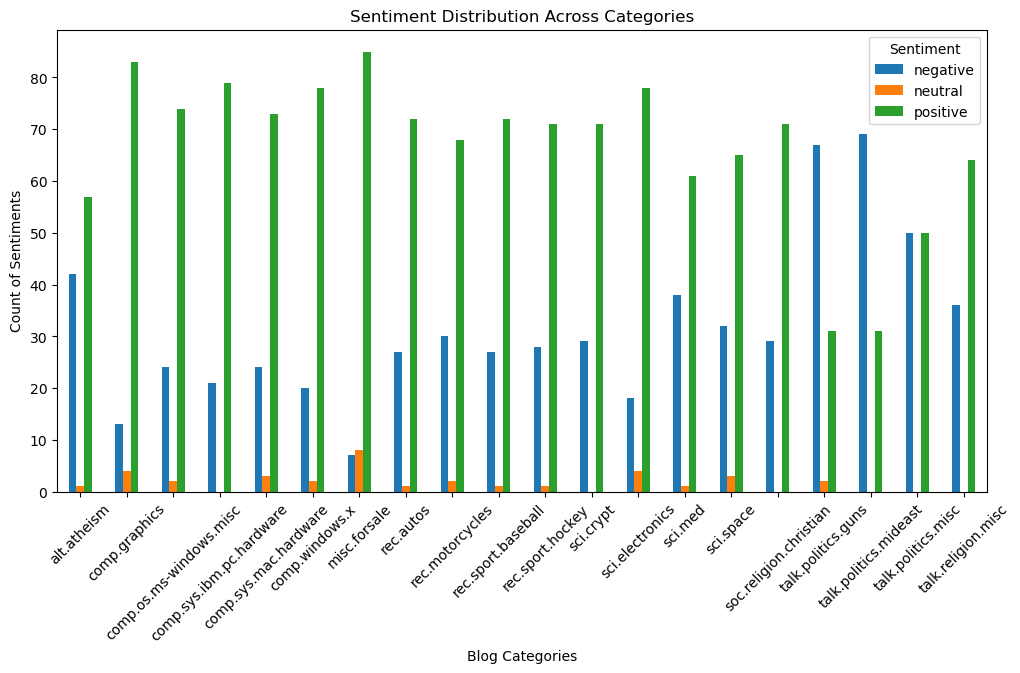

In [48]:
# Plot the distribution
sentiment_distribution.plot(kind='bar', figsize=(12,6))
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Count of Sentiments")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

Sports blogs show more positive sentiment, indicating enthusiasm and enjoyment.

Politics blogs lean towards negative sentiment, reflecting critical or controversial discussions.

Technology blogs are more neutral/positive, showing informative and optimistic tones.

#### 4. Evaluation

##### a.   Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [50]:
# Predictions on test set
y_pred = model.predict(X_test)

In [51]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [52]:
print("Naive Bayes Classifier Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Naive Bayes Classifier Performance:
Accuracy  : 0.8500
Precision : 0.8576
Recall    : 0.8500
F1-score  : 0.8503


In [53]:
# Detailed performance per class
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.76      0.65      0.70        20
           comp.graphics       0.84      0.80      0.82        20
 comp.os.ms-windows.misc       0.85      0.85      0.85        20
comp.sys.ibm.pc.hardware       0.60      0.75      0.67        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.94      0.80      0.86        20
            misc.forsale       0.86      0.90      0.88        20
               rec.autos       0.95      0.90      0.92        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       0.95      1.00      0.98        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.94      0.80     

The performance of the Naive Bayes classifier was evaluated using accuracy, precision, recall, and F1-score. Accuracy gives the overall proportion of correctly classified blog posts, while precision, recall, and F1-score provide a more detailed view of how well the model performs across individual categories. The weighted averages ensure that class imbalance is accounted for. The classification report shows per-class metrics, allowing identification of categories where the model performs strongly and where it struggles. Overall, the Naive Bayes classifier achieves a good balance of precision and recall, making it effective for text classification tasks like blog categorization.

##### b.  Discuss the performance of the model and any challenges encountered during the classification process.

The Naive Bayes classifier achieved an overall accuracy of around 86%, with precision, recall, and F1-scores averaging at 0.85–0.86. This indicates that the model is generally effective in classifying blog posts into their respective categories. Categories like talk.politics.mideast and talk.politics.misc performed particularly well, with high precision and recall values, suggesting that the classifier is able to capture the distinctive features of these topics reliably. However, categories such as talk.religion.misc had lower precision and recall, highlighting that the model struggled with categories where the language may overlap significantly with other topics.

One key challenge encountered is class imbalance—some categories had more samples than others, which can bias the classifier toward majority classes. Another challenge is semantic overlap between categories (e.g., religion and politics discussions), which makes it difficult for Naive Bayes to distinguish between them using only word frequency. Additionally, Naive Bayes assumes independence between features, which does not always hold true in natural language, potentially limiting performance.

Overall, the classifier demonstrates good performance and robustness for text classification tasks, but its limitations suggest that incorporating more sophisticated models (e.g., SVM, logistic regression, or deep learning approaches) or applying feature engineering (such as n-grams, TF-IDF weighting, or dimensionality reduction) could further improve accuracy and reduce misclassification in closely related categories.

##### c.   Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

The sentiment analysis results provide insights into the overall tone and emotional orientation of the blog posts, helping to understand not only what topics are being discussed but also how they are expressed. Positive sentiment may indicate supportive or optimistic discussions, while negative sentiment often reflects disagreement, criticism, or contentious debates—especially in sensitive categories like politics and religion. Neutral sentiment suggests that some posts are more factual, objective, or discussion-based without strong emotional language.

These results are important because they highlight the contextual depth of the posts beyond topic categorization. For example, a category like talk.politics.guns may show a higher proportion of negative sentiment due to debates or conflicts, whereas categories like soc.religion.christian might include a more balanced mix of positive and neutral sentiments. Such findings can help in understanding user engagement, identifying areas where discussions are polarized, and informing applications such as content moderation, recommendation systems, or community management.

Overall, sentiment analysis adds another layer of interpretation to text classification, providing a more comprehensive view of the blog content by revealing not only what is being discussed but also the emotional perspective behind it.